In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# # Create data generator for training and validation
# data_root = '/content/drive/MyDrive/Microfinance with Shariah principles - Kitabisa/ML Folder/Verfication/ktp_selfie_datasets'

# IMAGE_SHAPE = (150, 150)
# TRAINING_DATA_DIR = str(data_root)

# datagen_kwargs = dict(rescale=1./255, validation_split=.30)
# valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs,
#                                                                 rotation_range=40,
#                                                                 width_shift_range=0.2,
#                                                                 height_shift_range=0.2,
#                                                                 shear_range=0.2,
#                                                                 zoom_range=0.2,
#                                                                 horizontal_flip=True,
#                                                                 fill_mode='nearest'
#                                                                 )
# valid_generator = valid_datagen.flow_from_directory(
#     TRAINING_DATA_DIR, 
#     subset="validation", 
#     shuffle=True,
#     target_size=IMAGE_SHAPE,)

# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs,
#                                                                 rotation_range=40,
#                                                                 width_shift_range=0.2,
#                                                                 height_shift_range=0.2,
#                                                                 shear_range=0.2,
#                                                                 zoom_range=0.2,
#                                                                 horizontal_flip=True,
#                                                                 fill_mode='nearest'
#                                                                 )
# train_generator = train_datagen.flow_from_directory(
#     TRAINING_DATA_DIR, 
#     subset="training", 
#     shuffle=True,
#     target_size=IMAGE_SHAPE,)

In [4]:
train_data_dir = './ktp_selfie_datasets/Training'
valid_data_dir = './ktp_selfie_datasets/Validation'

In [5]:
img_height = 150
img_width = 150
batch_size = 8
train_datagen = ImageDataGenerator( 
    rotation_range=30, 
    width_shift_range=0.2,
    height_shift_range=0.2, 
    brightness_range=[0.5,1.5],  
    zoom_range=0.2,
    horizontal_flip=True, 
    rescale=1/255,
    preprocessing_function=None, 
    data_format=None, 
    #validation_split=0.2, 
    dtype=None
) # set validation split

valid_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    #subset='training'
) # set as training data

valid_generator = valid_datagen.flow_from_directory(
    #train_data_dir, # same directory as training data
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size= batch_size,
    class_mode='categorical',
    shuffle = False,
    #subset='validation'
) # set as validation data

Found 84 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # 3 output neuron. It will contain a value from 0-2 where 0 for class ('KK'), 1 for the class ('KTP'), and 2 for the class ('NPWP')
    tf.keras.layers.Dense(2, activation='softmax')  
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [8]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# mc = tf.keras.callbacks.ModelCheckpoint('ktp_selfie_model_01.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [9]:
history = model.fit(
            train_generator,
            # steps_per_epoch=100,
            epochs=10,
            validation_data=valid_generator,
            # callbacks = [mc], 
            # validation_steps=50,
            # verbose=2
            )

Epoch 1/10
11/11 [==============================] - 10s 169ms/step - loss: 0.6582 - accuracy: 0.6786 - val_loss: 0.2960 - val_accuracy: 0.9697
Epoch 2/10
11/11 [==============================] - 1s 89ms/step - loss: 0.2680 - accuracy: 0.9286 - val_loss: 0.1824 - val_accuracy: 0.9091
Epoch 3/10
11/11 [==============================] - 1s 89ms/step - loss: 0.1422 - accuracy: 0.9881 - val_loss: 0.1868 - val_accuracy: 0.9091
Epoch 4/10
11/11 [==============================] - 1s 83ms/step - loss: 0.1446 - accuracy: 0.9405 - val_loss: 0.1703 - val_accuracy: 0.9394
Epoch 5/10
11/11 [==============================] - 1s 82ms/step - loss: 0.1612 - accuracy: 0.9405 - val_loss: 0.1263 - val_accuracy: 0.9394
Epoch 6/10
11/11 [==============================] - 1s 84ms/step - loss: 0.0594 - accuracy: 0.9881 - val_loss: 0.1629 - val_accuracy: 0.9091
Epoch 7/10
11/11 [==============================] - 1s 90ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 0.1450 - val_accuracy: 0.9091
Epoch 8/10


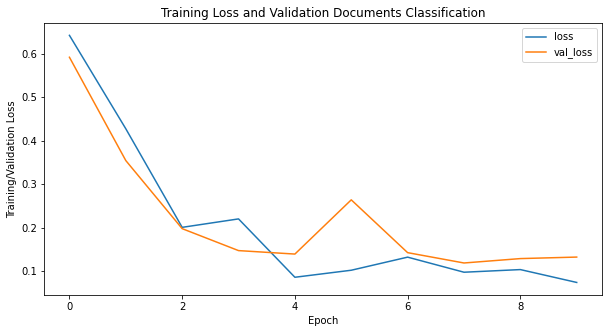

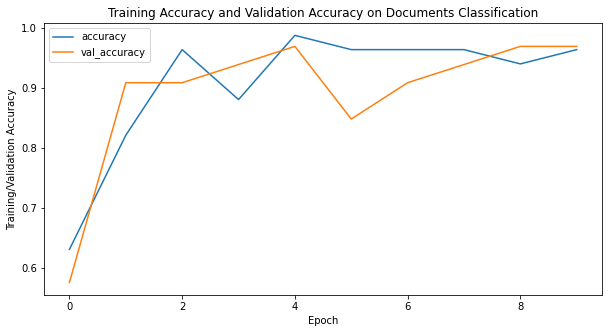

In [ ]:
# Plotting train_loss vs val_loss
plt.figure(figsize = (10, 5))
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.title("Training Loss and Validation Documents Classification")
plt.xlabel("Epoch")
plt.ylabel("Training/Validation Loss")
plt.legend()

# Plotting train_accuracy vs Val_accuracy
plt.figure(figsize = (10, 5))
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.title("Training Accuracy and Validation Accuracy on Documents Classification")
plt.xlabel("Epoch")
plt.ylabel("Training/Validation Accuracy")
plt.legend(loc = "upper left")

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

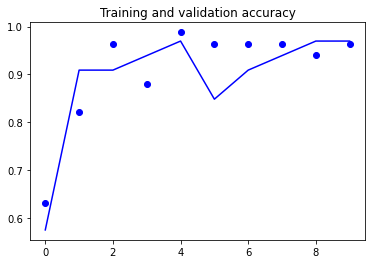

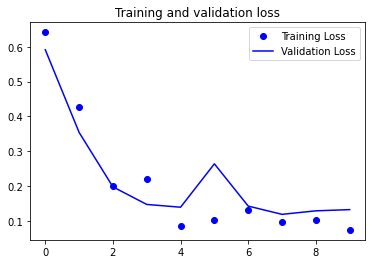

In [ ]:
# Plot training results
plot_loss_acc(history)

In [8]:
final_model = tf.keras.models.load_model('/content/drive/MyDrive/Microfinance with Shariah principles - Kitabisa/ML Folder/Verfication/ktp_selfie_model_01/ktp_selfie_model_01.h5')

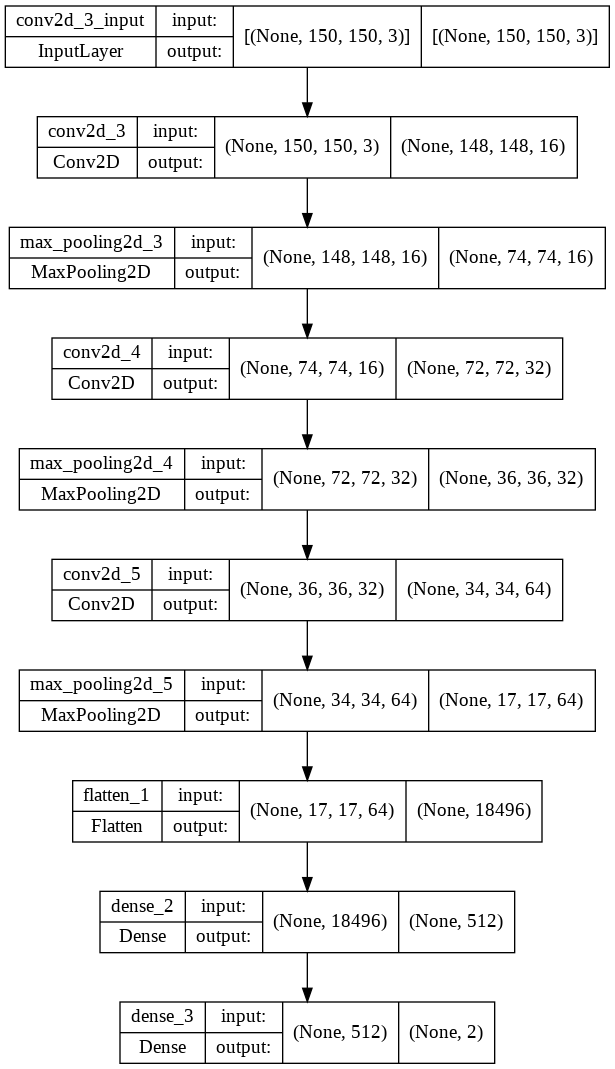

In [11]:
tf.keras.utils.plot_model(final_model, show_shapes=True)

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

output_class = 2
target_names = ['ktp','selfie']

predict = final_model.predict(valid_generator)

print("Confusion Matrix")
cm = confusion_matrix(valid_generator.classes, predict)
print(cm)
    
# show the accuracy, sensitivity, and specificity  
total = sum(sum(cm))  
if output_class == 2:
    acc = (cm[0][0] + cm[1][1]) / total
    print("acc: {:.4f}".format(acc))
    sensitivity = cm[0][0] / (cm[0][0] + cm[0][1])
    print("{} sensitivity: {:.4f}".format(target_names[0], sensitivity))
    sensitivity = cm[1][1] / (cm[1][0] + cm[1][1])
    print("{} sensitivity: {:.4f}".format(target_names[1], sensitivity))
else:
    print("Undefined")

print("Classification Report")
if output_class == 2:
    print(classification_report(valid_generator.classes, predict, target_names = target_names))
else:
    print("Undefined")

Confusion Matrix


ValueError: ignored

In [ ]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes)
  
  # if classes[0]>0.5:
  #   print(fn + " is a dog")
  # else:
  #   print(fn + " is a cat")
 

Saving selfie (46).jpg to selfie (46).jpg
[[0.00214257 0.9978574 ]]


In [ ]:
# model.save('docClassification_02.h5')